# Code for Section 5: The fast Fourier transform
## This code is for learning the Fourier transform.

### mikexcohen.com

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import timeit
import scipy.fftpack
from mpl_toolkits.mplot3d import Axes3D


---
# VIDEO: How the FFT works, speed tests
---


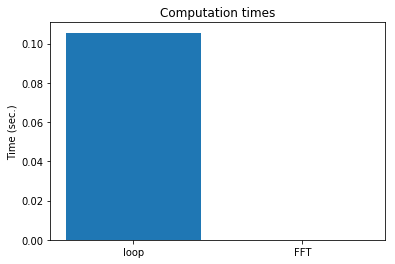

8.580900248489343e-05


In [4]:
# create the signal
pnts   = 1000
signal = np.random.randn(pnts)


# start the timer for "slow" Fourier transform
tic = timeit.default_timer()

# prepare the Fourier transform
fourTime = np.array(range(0,pnts))/pnts
fCoefs   = np.zeros(len(signal),dtype=complex)

for fi in range(0,pnts):
    csw = np.exp( -1j*2*np.pi*fi*fourTime )
    fCoefs[fi] = np.sum( np.multiply(signal,csw) )


# end timer for slow Fourier transform
toc = timeit.default_timer()
t1 = toc-tic


# time the fast Fourier transform
tic = timeit.default_timer()
fCoefsF = scipy.fftpack.fft(signal)
toc = timeit.default_timer()
t2 = toc-tic

# and plot
plt.bar([1,2],[t1,t2])
plt.title('Computation times')
plt.ylabel('Time (sec.)')
plt.xticks([1,2], ['loop','FFT'])
plt.show()


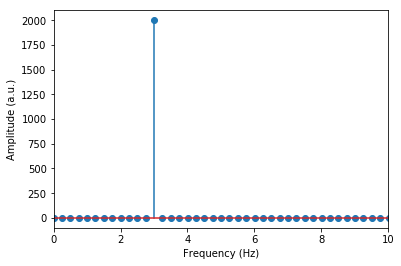

In [5]:
## fft still need normalizations

srate = 1000
time  = np.arange(0,2,1/srate)
npnts = len(time)

# signal
signal = 2*np.sin(2*np.pi*6*time)

# Fourier spectrum
signalX = scipy.fftpack.fft(signal)
hz = np.linspace(0,srate,npnts)

# amplitude
ampl = np.abs(signalX[0:len(hz)])

plt.stem(hz,ampl)
plt.xlim(0,10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (a.u.)')
plt.show()


---
# VIDEO: The fast inverse Fourier transform
---


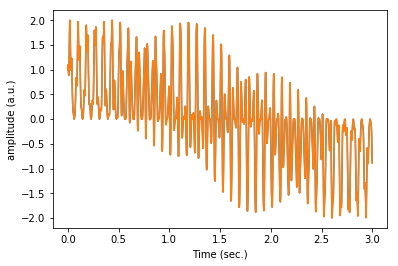

In [6]:
# set parameters
srate = 1000
time  = np.arange(0,3,1/srate)
pnts  = len(time)

# create multispectral signal
signal  = np.multiply( (1+np.sin(2*np.pi*12*time)) , np.cos(np.sin(2*np.pi*25*time)+time) )

# fft
signalX = scipy.fftpack.fft(signal)

# reconstruction via ifft
reconSig = scipy.fftpack.ifft(signalX)

plt.plot(time,signal,label='Original')
plt.plot(time,np.real(reconSig),label='Reconstructed')
plt.xlabel('Time (sec.)')
plt.ylabel('amplitude (a.u.)')
plt.show()


---
# VIDEO: The perfection of the Fourier transform
---


In [1]:
# number of time points
pnts = 1000 

# prepare the Fourier transform
fourTime = np.array(range(0,pnts))/pnts
F        = np.zeros((pnts,pnts),dtype=complex)

for fi in range(0,pnts):
    # create complex sine wave
    csw = np.exp( -1j*2*np.pi*fi*fourTime )
    
    # put csw into column of matrix F
    F[:,fi] = csw

# compute inverse of F (and normalize by N)
Finv = np.linalg.inv(F)*pnts

# plot one sine wave
plt.plot(fourTime,np.real(F[:,5]),label='real')
plt.plot(fourTime,np.imag(F[:,5]),label='imag')
plt.title('One column of matrix F')
plt.legend()
plt.show()

plt.plot(fourTime,np.real(Finv[:,5]),label='real')
plt.plot(fourTime,np.imag(Finv[:,5]),label='imag')
plt.title('One column of matrix F$^{-1}$')
plt.legend()
plt.show()

NameError: name 'np' is not defined

NameError: name 'np' is not defined